## Google Stock Price Prediction
### Author:Gowri S


This is a time series forecasting problem.It is an attempt to forecast the future values by understanding the past values, and forecast te future.
Basic steps in forecasting

    *Problem statement
    *Gathering the information
    *Understanding the data
    *Choosing and Fitting the models
    *Evaluating the performance
    *Forecast the Future
    
 Stock data is a sequential data that is they need to be analysed according to the order by time.
 In Recurrent neural network RNN we are dealt with problem of vanishing gradient thus previous data will become less significant after long backpropagation.That is memory is not that deep.So we use Long short term memory LSTM.This is because stock prediction need long term memory 

### Import neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset and explore

In [2]:
tesla=pd.read_csv(r"C:\Users\hp\Desktop\real world problems data set\bharat intern\TSLA.csv")
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
tesla=pd.read_csv(r"C:\Users\hp\Desktop\real world problems data set\bharat intern\TSLA.csv",parse_dates=True,index_col='Date')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639 entries, 2019-09-30 to 2022-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       639 non-null    float64
 1   Low        639 non-null    float64
 2   Open       639 non-null    float64
 3   Close      639 non-null    float64
 4   Volume     639 non-null    float64
 5   Adj Close  639 non-null    float64
dtypes: float64(6)
memory usage: 34.9 KB


<Axes: xlabel='Date'>

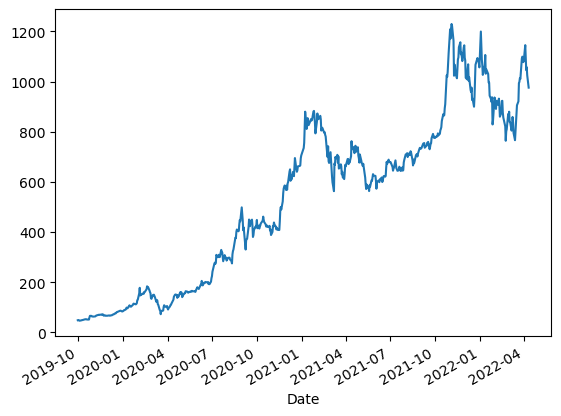

In [5]:
tesla['Close'].plot()

In [6]:
len(tesla)

639

In [7]:
tesla_close=tesla['Close']
tesla_close

Date
2019-09-30      48.174000
2019-10-01      48.938000
2019-10-02      48.625999
2019-10-03      46.605999
2019-10-04      46.285999
                 ...     
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
Name: Close, Length: 639, dtype: float64

In [8]:
tesla_close.reset_index(drop=True,inplace=True)
tesla_close

0        48.174000
1        48.938000
2        48.625999
3        46.605999
4        46.285999
          ...     
634    1091.260010
635    1045.760010
636    1057.260010
637    1025.489990
638     975.929993
Name: Close, Length: 639, dtype: float64

In [9]:
tesla_close=pd.DataFrame(tesla_close)
tesla_close

,Close
0,48.174000
1,48.938000
2,48.625999
3,46.605999
4,46.285999
...,...
634,1091.260010
635,1045.760010
636,1057.260010
637,1025.489990


### Train test split

In [10]:
training_data_len=int(np.ceil(len(tesla_close)*.95))
training_data_len

608

In [11]:
train=tesla_close.iloc[:training_data_len]
test=tesla_close.iloc[training_data_len:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

while we are applying scaling we need to split the data first and then apply scaling on the training data set and then we project the same on the test data set

In [15]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#timeseriesgenerator helps us to transform the values and save it in an array format

In [17]:
#help(TimeseriesGenerator)

### Model Building

In [18]:
len(test)

31

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [20]:
df_array=np.array(tesla_close)
df_array.shape

(639, 1)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [22]:
length=(len(test))-1

In [23]:
scaled_test.shape

(31, 1)

In [24]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=16)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=16)

In [25]:
model2=Sequential()
model2.add(LSTM(60,input_shape=(length,1)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(1))

In [26]:
model2.compile(optimizer='adam',loss='mse')

In [27]:
model2.fit_generator(generator,epochs=50,validation_data=validation_generator,shuffle=False)

Epoch 1/50
37/37 [==============================] - 6s 48ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 2/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0149 - val_loss: 0.0029
Epoch 3/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0103 - val_loss: 0.0070
Epoch 4/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 5/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0047 - val_loss: 0.0070
Epoch 6/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0036 - val_loss: 0.0080
Epoch 7/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 8/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 9/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 10/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0065
Epoch 11/

<Axes: >

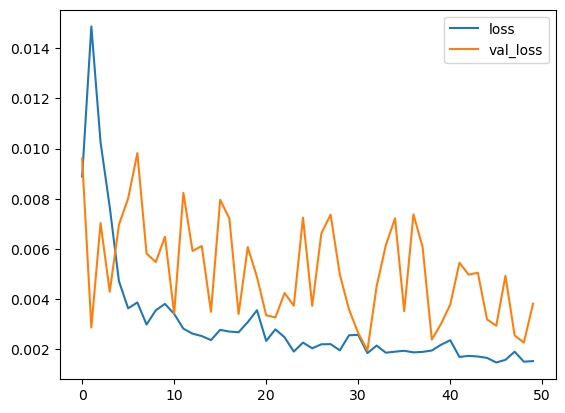

In [28]:
losses=pd.DataFrame(model2.history.history)
losses.plot()

### Use the trained model to make predictions on the test data

In [29]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range((len(test))):
    current_pred=model2.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
 

1/1 [==============================] - 0s 50ms/step


In [30]:
test_predictions

[array([0.6458263], dtype=float32),
 array([0.6444829], dtype=float32),
 array([0.6472516], dtype=float32),
 array([0.65302604], dtype=float32),
 array([0.6609211], dtype=float32),
 array([0.67024153], dtype=float32),
 array([0.68048275], dtype=float32),
 array([0.6912425], dtype=float32),
 array([0.7022277], dtype=float32),
 array([0.7132123], dtype=float32),
 array([0.72407466], dtype=float32),
 array([0.7346621], dtype=float32),
 array([0.7448652], dtype=float32),
 array([0.75464785], dtype=float32),
 array([0.7639733], dtype=float32),
 array([0.7728122], dtype=float32),
 array([0.7811352], dtype=float32),
 array([0.7889498], dtype=float32),
 array([0.79624677], dtype=float32),
 array([0.8030313], dtype=float32),
 array([0.80932325], dtype=float32),
 array([0.8151427], dtype=float32),
 array([0.82048994], dtype=float32),
 array([0.82537615], dtype=float32),
 array([0.8298365], dtype=float32),
 array([0.8339084], dtype=float32),
 array([0.8376079], dtype=float32),
 array([0.84096354]

In [31]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[ 810.7015068 ],
       [ 809.11146239],
       [ 812.38855676],
       [ 819.22332082],
       [ 828.56809463],
       [ 839.59998896],
       [ 851.7217318 ],
       [ 864.45725522],
       [ 877.4595968 ],
       [ 890.46123289],
       [ 903.31817197],
       [ 915.84973681],
       [ 927.92632798],
       [ 939.5053336 ],
       [ 950.54315408],
       [ 961.00507908],
       [ 970.85639823],
       [ 980.10593024],
       [ 988.74281047],
       [ 996.77317673],
       [1004.22045146],
       [1011.10848038],
       [1017.43761624],
       [1023.2210518 ],
       [1028.50041124],
       [1033.31999966],
       [1037.69886542],
       [1041.67066061],
       [1045.27334088],
       [1048.50182665],
       [1051.39294475]])

In [32]:
test['LSTM_Predictions']=true_predictions
test

,Close,LSTM_Predictions
608,870.429993,810.701507
609,864.369995,809.111462
610,879.890015,812.388557
611,839.289978,819.223321
612,838.289978,828.568095
613,804.580017,839.599989
614,824.400024,851.721732
615,858.969971,864.457255
616,838.299988,877.459597
617,795.349976,890.461233


<Axes: >

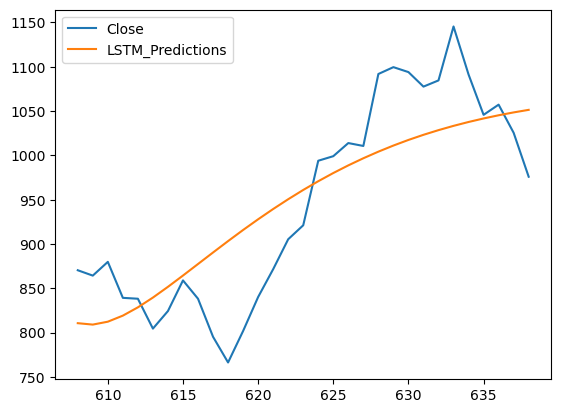

In [33]:
test.plot()

### Forecasting

In [34]:
forcast2=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    current_pred=model2.predict(current_batch)[0]
    forcast2.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 42ms/step


In [35]:
forcast2=scaler.inverse_transform(forcast2)

In [36]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forcast2.flatten())))
previouss_data=pd.DataFrame(df_array.flatten())
future_data=pd.DataFrame(forcast2.flatten())

Text(0, 0.5, 'close')

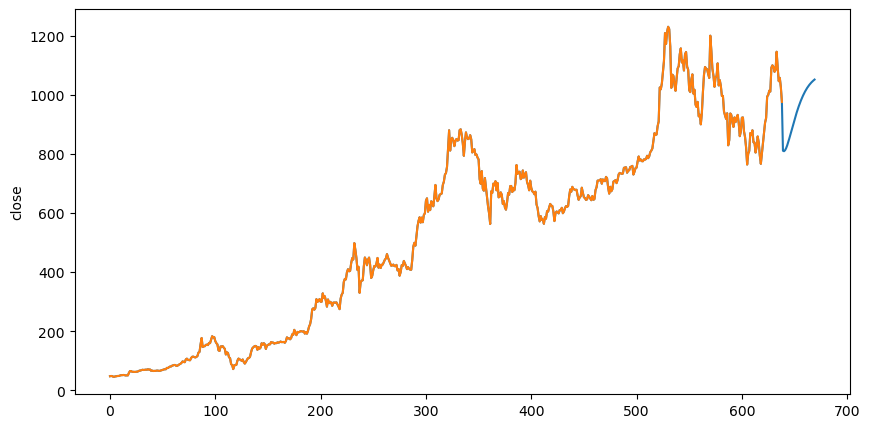

In [37]:
plt.figure(figsize=(10,5))
plt.plot(full_data,label='predicted')
plt.plot(previouss_data,label='original')
plt.ylabel('close')